In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
filename = "camera_intrinsics.h5"
filenameEx = "extrinsics.h5"
main_K, main_distortion = None, None

with h5py.File(filename, "r") as data:

    main_K = np.array(data["main"]["K"])
    main_distortion = np.array(data["main"]["distortion"])
    side_k = np.array(data["leftpillar"]["K"])
    fs_K = np.array(data["fisheye"]["K"])
#get the main camera extrinsics

with h5py.File(filenameEx,"r") as data:
    main_EX = np.array(data["main"])
    left = np.array(data["leftpillar"])
    
dst = main_distortion
R_ex = np.zeros((3, 3))

for i in range(0,3):
    for k in range(0,3):
        R_ex[i][k] = main_EX[i][k]       

In [2]:
def uvtoXYZ_c(u, v, main_k):
    
    u = u - 300/2
    v = 100/2 - v
    image_vec = np.array([u, v, 1]).T # 2D points in image
    
    n = np.array([0,0,1]).T # normal vector in car/road frame
    k = main_K
    k[0][2]= 152  #modifying principal points in K for image size
    k[1][2]= 50
    k_inv = np.linalg.inv(k)
    h = 1.4660132 # height of main cam (z tranlastion in extrinsic)
    n_c = np.dot(R_ex.T, n)
    denom = np.matmul(n_c.T , np.matmul( k_inv , image_vec.T))
    xyz_c = h * np.matmul(k_inv , image_vec)/denom
    y = xyz_c 
    return np.matmul(R_ex,y) + np.array([-2.0568478, +.0588, -1.4660132])




[[ 1.14267314e+01  2.23309851e+00  0.00000000e+00]
 [ 1.12779586e+01  2.20372162e+00  2.22044605e-16]
 [ 1.11326380e+01  2.17414528e+00  0.00000000e+00]
 [ 1.09906223e+01  2.14447874e+00  2.22044605e-16]
 [ 1.08517722e+01  2.11482695e+00  2.22044605e-16]
 [ 1.07159564e+01  2.08529078e+00  0.00000000e+00]
 [ 1.05830502e+01  2.05596722e+00  0.00000000e+00]
 [ 1.04529360e+01  2.02694961e+00  0.00000000e+00]
 [ 1.03255022e+01  1.99832782e+00  0.00000000e+00]
 [ 1.02006431e+01  1.97018842e+00 -2.22044605e-16]
 [ 1.00782585e+01  1.94261483e+00  0.00000000e+00]
 [ 9.95825351e+00  1.91568749e+00  0.00000000e+00]
 [ 9.84053784e+00  1.88948394e+00 -2.22044605e-16]
 [ 9.72502591e+00  1.86407900e+00  0.00000000e+00]
 [ 9.61163639e+00  1.83954480e+00  0.00000000e+00]
 [ 9.50029202e+00  1.81595098e+00 -2.22044605e-16]
 [ 9.39091936e+00  1.79336468e+00  0.00000000e+00]
 [ 9.28344855e+00  1.77185069e+00  0.00000000e+00]
 [ 9.17781315e+00  1.75147150e+00  0.00000000e+00]
 [ 9.07394993e+00  1.73228737e+

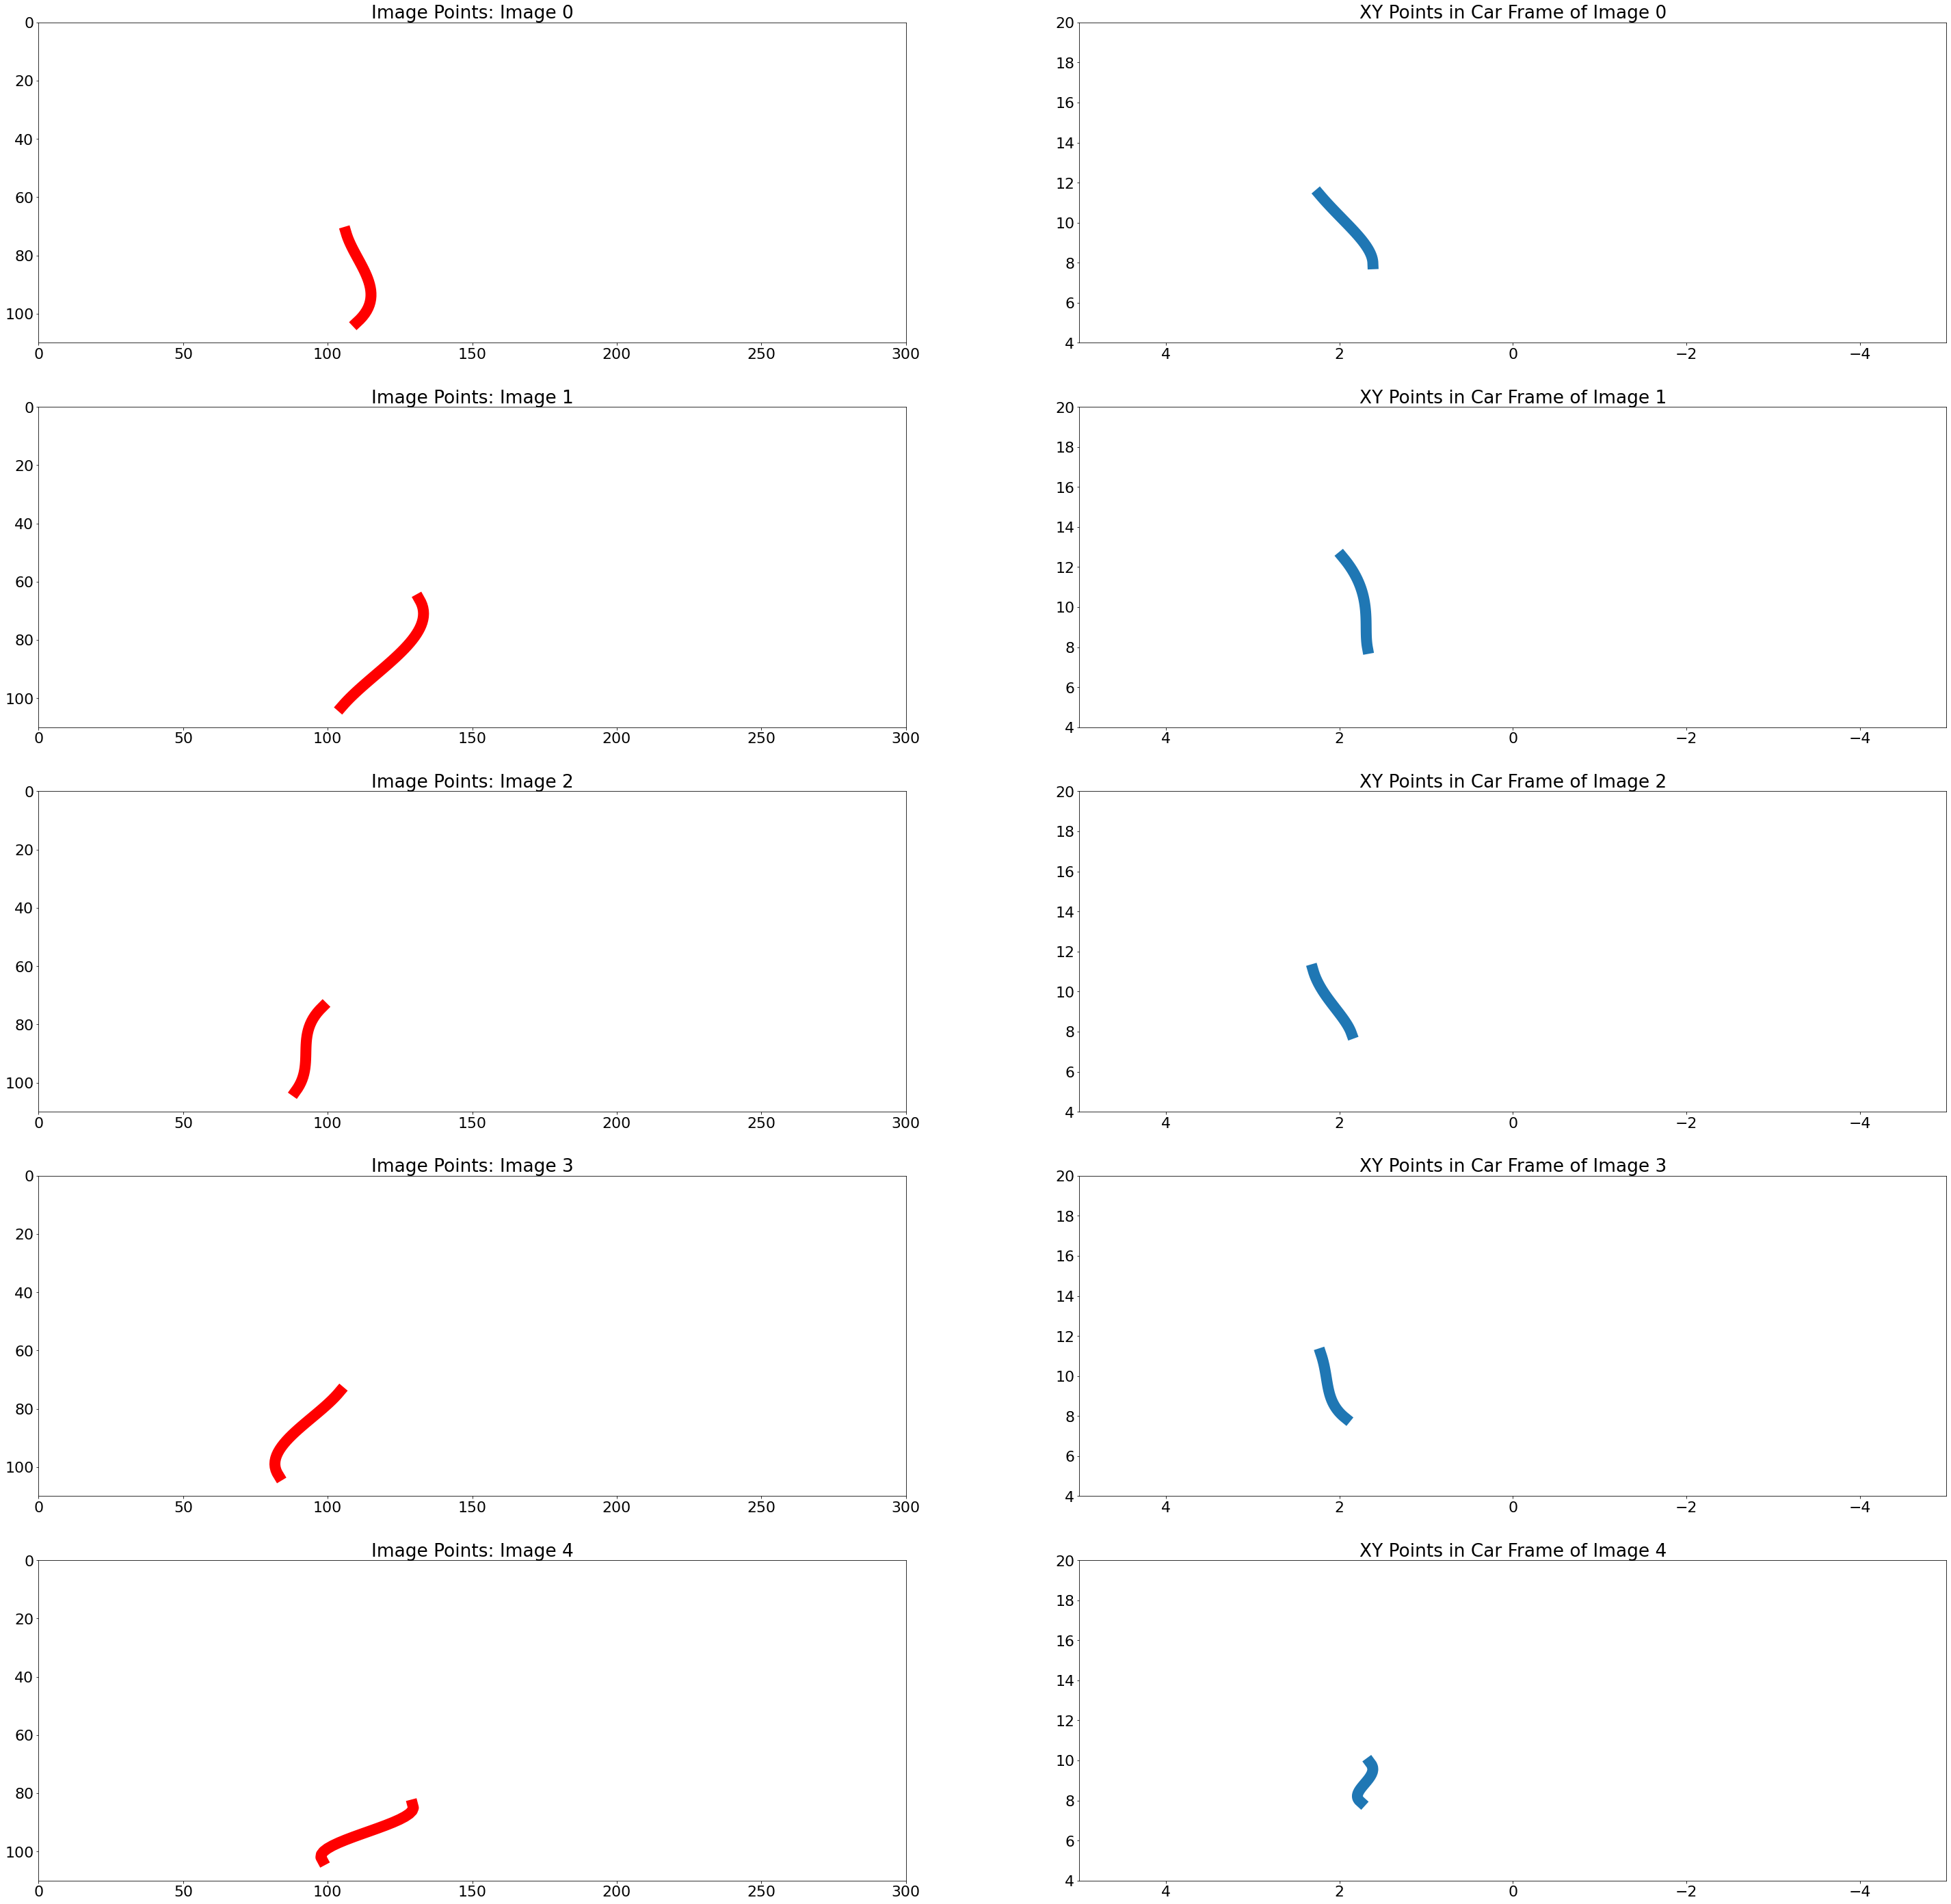

In [3]:
test_points = np.loadtxt("poly_points_0802.csv", delimiter = ",")
test_points1 = np.loadtxt("poly_points_0141.csv", delimiter = ",")
test_points2 = np.loadtxt("poly_points_0825.csv", delimiter = ",")
test_points3 = np.loadtxt("poly_points_0848.csv", delimiter = ",")
test_points4 = np.loadtxt("poly_points_0902.csv", delimiter = ",")


test_points = np.array([[test_points[0][i], test_points[1][i]] for i in range(len(test_points[0]))])
test_points1 = np.array([[test_points1[0][i], test_points1[1][i]] for i in range(len(test_points1[0]))])
test_points2 = np.array([[test_points2[0][i], test_points2[1][i]] for i in range(len(test_points2[0]))])
test_points3 = np.array([[test_points3[0][i], test_points3[1][i]] for i in range(len(test_points3[0]))])
test_points4 = np.array([[test_points4[0][i], test_points4[1][i]] for i in range(len(test_points4[0]))])


datasets = [test_points, test_points1, test_points2, test_points3, test_points4]

#outputs0802 = np.array([uvtoXYZ_c(pt[0], pt[1], main_K) for pt in datasets[0]])
#outputs0141 = np.array([uvtoXYZ_c(pt[0], pt[1], main_K) for pt in datasets[1]])
#outputs0825 = np.array([uvtoXYZ_c(pt[0], pt[1], main_K) for pt in datasets[2]])
#outputs0848 = np.array([uvtoXYZ_c(pt[0], pt[1], main_K) for pt in datasets[3]])
#outputs0902 = np.array([uvtoXYZ_c(pt[0], pt[1], main_K) for pt in datasets[4]])


#np.savetxt("worldXY0802.csv",outputs0802, delimiter = "," )
#np.savetxt("worldXY0141.csv",outputs0141, delimiter = "," )
#np.savetxt("worldXY0825.csv",outputs0825, delimiter = "," )
#np.savetxt("worldXY0848.csv",outputs0848, delimiter = "," )
#np.savetxt("worldXY0902.csv",outputs0902, delimiter = "," )

matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(5, 2, figsize=(50, 50))

for i in range(5):
    data = datasets[i]
    outputs = np.array([uvtoXYZ_c(pt[0], pt[1], main_K) for pt in data])
    ax[i][0].plot(data[:, 0], data[:, 1], "o-r", linewidth = 16)
    ax[i][0].set_xlim(0, 300)
    ax[i][0].set_ylim(0, 110)
    ax[i][0].set_title("Image Points: Image "+ str(i))
    ax[i][0].invert_yaxis()

    ax[i][1].plot(outputs[:, 1],outputs[:, 0],linewidth = 16)
    ax[i][1].set_title("XY Points in Car Frame of Image " + str(i))
    ax[i][1].set_xlim(-5, 5)
    ax[i][1].set_ylim(4, 20)
    ax[i][1].invert_xaxis()
